In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.DataFrame({'Column1': [1, 2, 'N/A', 4, 5],
        'Column2': [10, 'NA', 30, 40, 50]})
data

,Column1,Column2
0,1,10
1,2,NA
2,N/A,30
3,4,40
4,5,50


In [6]:
data.to_csv('data.csv',index=False)

In [3]:
data.isnull().sum()

Column1    0
Column2    0
dtype: int64

In [35]:
df = pd.read_csv('data.csv', na_values=['N/A', 'NA','None'])
df

,Column1,Column2
0,1.0,10.0
1,2.0,NaN
2,NaN,30.0
3,4.0,40.0
4,5.0,50.0


In [10]:
df.isnull().sum()

Column1    1
Column2    1
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  4 non-null      float64
 1   Column2  4 non-null      float64
dtypes: float64(2)
memory usage: 212.0 bytes


In [11]:
df.sample(2)

,Column1,Column2
3,4.0,40.0
1,2.0,NaN


In [13]:
df.head(2)

,Column1,Column2
0,1.0,10.0
1,2.0,NaN


In [14]:
df.tail(2)

,Column1,Column2
3,4.0,40.0
4,5.0,50.0


In [15]:
print('Total missing values in data:',df.isnull().sum().sum())

Total missing values in data: 2


In [17]:
missing_values = df.isnull().sum().sum()

In [18]:
print(f'Total missing values in data:{missing_values}')

Total missing values in data:2


In [30]:
var_1 = df.dropna()

In [31]:
var_1

,Column1,Column2
0,1.0,10.0
3,4.0,40.0
4,5.0,50.0


In [32]:
df

,Column1,Column2
0,1.0,10.0
1,2.0,NaN
2,NaN,30.0
3,4.0,40.0
4,5.0,50.0


In [36]:
df_cleaned = df.dropna()

In [37]:
df_cleaned

,Column1,Column2
0,1.0,10.0
3,4.0,40.0
4,5.0,50.0


In [33]:
df.dropna(inplace=True)

In [34]:
df

,Column1,Column2
0,1.0,10.0
3,4.0,40.0
4,5.0,50.0


In [39]:
df = pd.DataFrame({
                  'Order_ID': [101, 102, 103, 104, 105],
                  'Customer_Name': ['Alice', 'Bob', 'Charlie', None, 'Eve'],
                  'Product': ['Laptop', 'Keyboard', 'Monitor', 'Mouse', None],
                  'Quantity': [1, 2, np.nan, 4, 5],
                  'Price': [1000, 500, np.nan, 200, 300]
              })
df

,Order_ID,Customer_Name,Product,Quantity,Price
0,101,Alice,Laptop,1.0,1000.0
1,102,Bob,Keyboard,2.0,500.0
2,103,Charlie,Monitor,NaN,NaN
3,104,None,Mouse,4.0,200.0
4,105,Eve,None,5.0,300.0


In [42]:
# Fill missing values in the 'Quantity' and 'Price' columns with the mean
df_filled = df.fillna({'Quantity': 10, 'Price': df['Price'].mean()})

In [43]:
df_filled

,Order_ID,Customer_Name,Product,Quantity,Price
0,101,Alice,Laptop,1.0,1000.0
1,102,Bob,Keyboard,2.0,500.0
2,103,Charlie,Monitor,10.0,500.0
3,104,None,Mouse,4.0,200.0
4,105,Eve,None,5.0,300.0


In [44]:
df

,Order_ID,Customer_Name,Product,Quantity,Price
0,101,Alice,Laptop,1.0,1000.0
1,102,Bob,Keyboard,2.0,500.0
2,103,Charlie,Monitor,NaN,NaN
3,104,None,Mouse,4.0,200.0
4,105,Eve,None,5.0,300.0


In [45]:
# Use linear interpolation to fill missing values
df_interpolated = df.interpolate()
df_interpolated

/var/folders/7n/zc599xk56tgff9vzxdzzww8h0000gn/T/ipykernel_25094/980070153.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate()


,Order_ID,Customer_Name,Product,Quantity,Price
0,101,Alice,Laptop,1.0,1000.0
1,102,Bob,Keyboard,2.0,500.0
2,103,Charlie,Monitor,3.0,350.0
3,104,None,Mouse,4.0,200.0
4,105,Eve,None,5.0,300.0


In [49]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Price'>

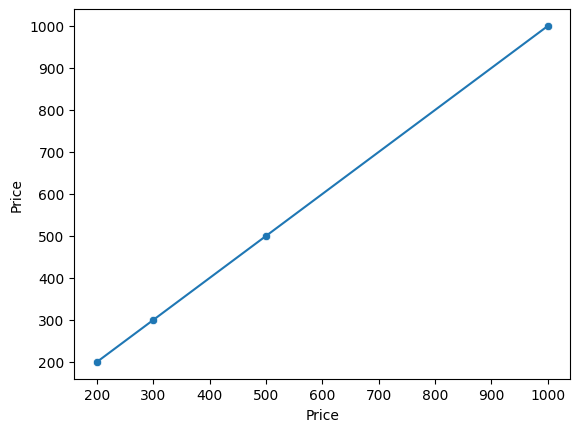

In [54]:
sns.scatterplot(data=df,x='Price',y='Price')
sns.lineplot(data=df,x='Price',y='Price')

In [55]:
df.isnull().sum()

Order_ID         0
Customer_Name    1
Product          1
Quantity         1
Price            1
dtype: int64

In [57]:
df['Quantity'].isnull()

0    False
1    False
2     True
3    False
4    False
Name: Quantity, dtype: bool

In [56]:
df[df['Quantity'].isnull()]

,Order_ID,Customer_Name,Product,Quantity,Price
2,103,Charlie,Monitor,NaN,NaN


In [59]:
df.iloc[1:4]

,Order_ID,Customer_Name,Product,Quantity,Price
1,102,Bob,Keyboard,2.0,500.0
2,103,Charlie,Monitor,NaN,NaN
3,104,None,Mouse,4.0,200.0


In [63]:
# isi spesifik index
df.iloc[2,3] = 'None'

/var/folders/7n/zc599xk56tgff9vzxdzzww8h0000gn/T/ipykernel_25094/416328677.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[2,3] = 'None'


In [64]:
df

,Order_ID,Customer_Name,Product,Quantity,Price
0,101,Alice,Laptop,1.0,1000.0
1,102,Bob,Keyboard,2.0,500.0
2,103,Charlie,Monitor,None,NaN
3,104,None,Mouse,4.0,200.0
4,105,Eve,None,5.0,300.0


In [65]:
for index, i in enumerate(df['Quantity']):
    try:
        float(i)
    except:
        print(i)
        print(index)

None
2


In [66]:
# Replace 'None' with 'Unknown' in column Product, row-4
df_replaced = df.replace(to_replace=[None], value='Unknown')
df_replaced


,Order_ID,Customer_Name,Product,Quantity,Price
0,101,Alice,Laptop,1.0,1000.0
1,102,Bob,Keyboard,2.0,500.0
2,103,Charlie,Monitor,None,NaN
3,104,Unknown,Mouse,4.0,200.0
4,105,Eve,Unknown,5.0,300.0


In [67]:
# Sample data with duplicate rows
data = {
    'Order_ID': [101, 102, 103, 103, 104],
    'Customer_Name': ['Alice', 'Bob', 'Charlie', 'Charlie', 'Eve'],
    'Product': ['Laptop', 'Keyboard', 'Monitor', 'Monitor', 'Mouse'],
    'Quantity': [1, 2, 1, 1, 1],
    'Price': [1000, 500, 300, 300, 200]
}

df = pd.DataFrame(data)
df


,Order_ID,Customer_Name,Product,Quantity,Price
0,101,Alice,Laptop,1,1000
1,102,Bob,Keyboard,2,500
2,103,Charlie,Monitor,1,300
3,103,Charlie,Monitor,1,300
4,104,Eve,Mouse,1,200


In [68]:
df

,Order_ID,Customer_Name,Product,Quantity,Price
0,101,Alice,Laptop,1,1000
1,102,Bob,Keyboard,2,500
2,103,Charlie,Monitor,1,300
3,103,Charlie,Monitor,1,300
4,104,Eve,Mouse,1,200


In [69]:
df.duplicated().sum()

1

In [70]:
df[df['Order_ID'].duplicated()]

,Order_ID,Customer_Name,Product,Quantity,Price
3,103,Charlie,Monitor,1,300


In [74]:
df_cleaned = df.drop_duplicates(keep='last')
df_cleaned

,Order_ID,Customer_Name,Product,Quantity,Price
0,101,Alice,Laptop,1,1000
1,102,Bob,Keyboard,2,500
3,103,Charlie,Monitor,1,300
4,104,Eve,Mouse,1,200


In [75]:
# Sample sales transaction data
data = {
    'Order_ID': [101, 102, 103, 104, 105],
    'Date': ['2023-07-15', '2023-07-16', '2023-07-17', '2023-07-18', '2023-07-19'],
    'Customer_ID': ['C001', 'C002', 'C003', 'C004', 'C005'],
    'Product': ['Laptop', 'Keyboard', 'Monitor', 'Mouse', 'Headphones'],
    'Quantity': ['1', '2', '3', '4', '5'],
    'Price': ['1000.50', '250.25', '350.75', '75.20', '120.99']
}
data

{'Order_ID': [101, 102, 103, 104, 105],
 'Date': ['2023-07-15',
  '2023-07-16',
  '2023-07-17',
  '2023-07-18',
  '2023-07-19'],
 'Customer_ID': ['C001', 'C002', 'C003', 'C004', 'C005'],
 'Product': ['Laptop', 'Keyboard', 'Monitor', 'Mouse', 'Headphones'],
 'Quantity': ['1', '2', '3', '4', '5'],
 'Price': ['1000.50', '250.25', '350.75', '75.20', '120.99']}

In [76]:

df = pd.DataFrame(data)
df

,Order_ID,Date,Customer_ID,Product,Quantity,Price
0,101,2023-07-15,C001,Laptop,1,1000.50
1,102,2023-07-16,C002,Keyboard,2,250.25
2,103,2023-07-17,C003,Monitor,3,350.75
3,104,2023-07-18,C004,Mouse,4,75.20
4,105,2023-07-19,C005,Headphones,5,120.99


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order_ID     5 non-null      int64 
 1   Date         5 non-null      object
 2   Customer_ID  5 non-null      object
 3   Product      5 non-null      object
 4   Quantity     5 non-null      object
 5   Price        5 non-null      object
dtypes: int64(1), object(5)
memory usage: 372.0+ bytes


In [78]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Order_ID                int64
Date           datetime64[ns]
Customer_ID            object
Product                object
Quantity               object
Price                  object
dtype: object


In [82]:
df.set_index(df['Date'],inplace=True)

In [83]:
df

,Order_ID,Date,Customer_ID,Product,Quantity,Price
Date,,,,,,
2023-07-15,101,2023-07-15,C001,Laptop,1,1000.50
2023-07-16,102,2023-07-16,C002,Keyboard,2,250.25
2023-07-17,103,2023-07-17,C003,Monitor,3,350.75
2023-07-18,104,2023-07-18,C004,Mouse,4,75.20
2023-07-19,105,2023-07-19,C005,Headphones,5,120.99


In [88]:
df.loc['2023-07-18']

Order_ID                       104
Date           2023-07-18 00:00:00
Customer_ID                   C004
Product                      Mouse
Quantity                         4
Price                        75.20
Name: 2023-07-18 00:00:00, dtype: object

In [89]:
df['Price'] = df['Price'].astype(float)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2023-07-15 to 2023-07-19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order_ID     5 non-null      int64         
 1   Date         5 non-null      datetime64[ns]
 2   Customer_ID  5 non-null      object        
 3   Product      5 non-null      object        
 4   Quantity     5 non-null      object        
 5   Price        5 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 452.0+ bytes


<Axes: xlabel='Date'>

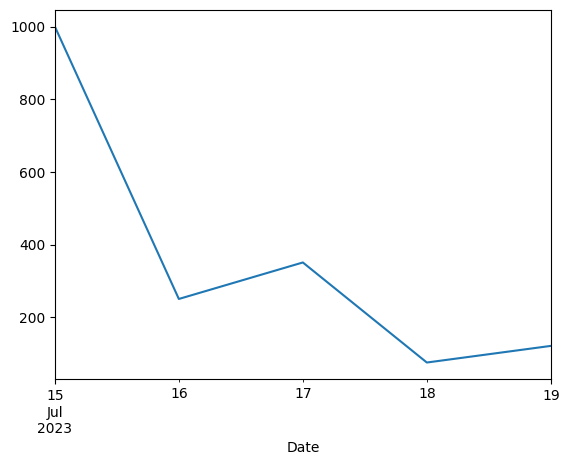

In [91]:
df['Price'].plot(kind='line')

In [92]:
df['Quantity'] = df['Quantity'].astype(int)
print(df.dtypes)

Order_ID                int64
Date           datetime64[ns]
Customer_ID            object
Product                object
Quantity                int64
Price                 float64
dtype: object


In [102]:
df = pd.DataFrame({
    'Transaction_ID': [101, 102, 103, 104, 105],
    'Customer_Name': ['  John Doe  ', 'Alice', '  Bob  ', 'Charlie', 'Eve'],
    'Product_Description': ['Laptop Asus Core i5', 'Keyboard Logitech', 'Monitor Samsung', 'Mouse HP', 'Headphones Sony']
})

df

,Transaction_ID,Customer_Name,Product_Description
0,101,John Doe,Laptop Asus Core i5
1,102,Alice,Keyboard Logitech
2,103,Bob,Monitor Samsung
3,104,Charlie,Mouse HP
4,105,Eve,Headphones Sony


In [94]:
# Remove leading/trailing whitespaces from 'Customer_Name' and 'Product_Description'
df['Customer_Name'] = df['Customer_Name'].str.strip()
df['Product_Description'] = df['Product_Description'].str.strip()
df

,Transaction_ID,Customer_Name,Product_Description
0,101,John Doe,Laptop Asus Core i5
1,102,Alice,Keyboard Logitech
2,103,Bob,Monitor Samsung
3,104,Charlie,Mouse HP
4,105,Eve,Headphones Sony


In [98]:
df['Customer_Name'] = df['Customer_Name'].str.upper()

In [99]:
df

,Transaction_ID,Customer_Name,Product_Description
0,101,JOHN DOE,Laptop Asus Core i5
1,102,ALICE,Keyboard Logitech
2,103,BOB,Monitor Samsung
3,104,CHARLIE,Mouse HP
4,105,EVE,Headphones Sony


In [100]:
# Remove 'Core i5' from 'Product_Description'
df['Product_Description'] = df['Product_Description'].str.replace('Core i5', '')

# Replace 'Sony' with 'Sony Corporation' in 'Product_Description'
df['Product_Description'] = df['Product_Description'].str.replace('Sony', 'Sony Corporation')

df

,Transaction_ID,Customer_Name,Product_Description
0,101,JOHN DOE,Laptop Asus
1,102,ALICE,Keyboard Logitech
2,103,BOB,Monitor Samsung
3,104,CHARLIE,Mouse HP
4,105,EVE,Headphones Sony Corporation


In [109]:
print(type(df['Product_Description']))
df['Product_Description']

<class 'pandas.core.series.Series'>


0    Laptop Asus Core i5
1      Keyboard Logitech
2        Monitor Samsung
3               Mouse HP
4        Headphones Sony
Name: Product_Description, dtype: object

In [110]:
print(type(df[['Product_Description']]))
df[['Product_Description']]

<class 'pandas.core.frame.DataFrame'>


,Product_Description
0,Laptop Asus Core i5
1,Keyboard Logitech
2,Monitor Samsung
3,Mouse HP
4,Headphones Sony


In [114]:
# Split 'Product_Description' into two separate columns
df['Product_Description'][:].str.split(' ', n=8, expand=True)

,0,1,2,3
0,Laptop,Asus,Core,i5
1,Keyboard,Logitech,None,None
2,Monitor,Samsung,None,None
3,Mouse,HP,None,None
4,Headphones,Sony,None,None


In [115]:
data = {
    'Order_ID': [101, 102, 103, 104, 105],
    'Date_Time': ['2023-07-15 10:30:00', '2023-07-16 15:45:00', '2023-07-17 12:00:00', '2023-07-18 09:00:00', '2023-07-19 16:20:00'],
    'Customer_ID': ['C001', 'C002', 'C003', 'C004', 'C005'],
    'Product': ['Laptop', 'Keyboard', 'Monitor', 'Mouse', 'Headphones'],
    'Quantity': [1, 2, 3, 4, 5],
    'Price': [1000, 250, 350, 75, 120]
}

df = pd.DataFrame(data)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

df

,Order_ID,Date_Time,Customer_ID,Product,Quantity,Price
0,101,2023-07-15 10:30:00,C001,Laptop,1,1000
1,102,2023-07-16 15:45:00,C002,Keyboard,2,250
2,103,2023-07-17 12:00:00,C003,Monitor,3,350
3,104,2023-07-18 09:00:00,C004,Mouse,4,75
4,105,2023-07-19 16:20:00,C005,Headphones,5,120


In [116]:
# Extract year, month, and day from 'Date_Time'
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month
df['Day'] = df['Date_Time'].dt.day

df[['Date_Time', 'Year', 'Month', 'Day']]

,Date_Time,Year,Month,Day
0,2023-07-15 10:30:00,2023,7,15
1,2023-07-16 15:45:00,2023,7,16
2,2023-07-17 12:00:00,2023,7,17
3,2023-07-18 09:00:00,2023,7,18
4,2023-07-19 16:20:00,2023,7,19


In [145]:
data_1 = {
    'Name':['budi','joko','bambang'],
    'Price':['Rp 10000','Rp 9000','Rp 70000']
}

new_data_1 = pd.DataFrame(data_1)

In [149]:
new_data_1['Price'][0][3:]

'10000'

In [138]:
list_1 = []
for i in new_data_1['Price']:
    list_1.append(int(i[3:]))


In [141]:
new_data_1['Price'] = list_1

In [142]:
new_data_1

,Name,Price
0,budi,10000
1,joko,9000
2,bambang,70000


In [143]:
new_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Price   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [154]:
df[['Date_Time']]

,Date_Time
0,2023-07-15 10:30:00
1,2023-07-16 15:45:00
2,2023-07-17 12:00:00
3,2023-07-18 09:00:00
4,2023-07-19 16:20:00


In [158]:
# Format 'Date_Time' to a specific format (e.g., "yyyy-mm-dd HH:MM")
df['Formatted_Date'] = df['Date_Time'].dt.strftime('%Y-%m-%d %H:%M')

df[['Date_Time', 'Formatted_Date']]

,Date_Time,Formatted_Date
0,2023-07-15 10:30:00,2023-07-15 10:30
1,2023-07-16 15:45:00,2023-07-16 15:45
2,2023-07-17 12:00:00,2023-07-17 12:00
3,2023-07-18 09:00:00,2023-07-18 09:00
4,2023-07-19 16:20:00,2023-07-19 16:20


In [159]:
from datetime import datetime

datetime.datetime(2024, 5, 24, 15, 11, 22, 429615)

In [161]:
# Calculate time difference from the current time
current_time = datetime.now()
df['Time_Difference'] = current_time - df['Date_Time']

df[['Date_Time', 'Time_Difference']]

,Date_Time,Time_Difference
0,2023-07-15 10:30:00,314 days 04:41:48.097513
1,2023-07-16 15:45:00,312 days 23:26:48.097513
2,2023-07-17 12:00:00,312 days 03:11:48.097513
3,2023-07-18 09:00:00,311 days 06:11:48.097513
4,2023-07-19 16:20:00,309 days 22:51:48.097513


In [162]:
# Calculate time difference from the current time
current_time = pd.to_datetime('2023-07-20 10:00:00')
df['Time_Difference'] = current_time - df['Date_Time']

df[['Date_Time', 'Time_Difference']]

,Date_Time,Time_Difference
0,2023-07-15 10:30:00,4 days 23:30:00
1,2023-07-16 15:45:00,3 days 18:15:00
2,2023-07-17 12:00:00,2 days 22:00:00
3,2023-07-18 09:00:00,2 days 01:00:00
4,2023-07-19 16:20:00,0 days 17:40:00


In [163]:
# Assuming the original datetime is in UTC and we want to convert it to Jakarta timezone (Asia/Jakarta)
df['Date_Time_Jakarta'] = df['Date_Time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Jakarta')

df[['Date_Time', 'Date_Time_Jakarta']]

,Date_Time,Date_Time_Jakarta
0,2023-07-15 10:30:00,2023-07-15 17:30:00+07:00
1,2023-07-16 15:45:00,2023-07-16 22:45:00+07:00
2,2023-07-17 12:00:00,2023-07-17 19:00:00+07:00
3,2023-07-18 09:00:00,2023-07-18 16:00:00+07:00
4,2023-07-19 16:20:00,2023-07-19 23:20:00+07:00


In [164]:
df[['Date_Time', 'Date_Time_Jakarta']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype                       
---  ------             --------------  -----                       
 0   Date_Time          5 non-null      datetime64[ns]              
 1   Date_Time_Jakarta  5 non-null      datetime64[ns, Asia/Jakarta]
dtypes: datetime64[ns, Asia/Jakarta](1), datetime64[ns](1)
memory usage: 212.0 bytes


In [167]:
!wget 'https://github.com/FTDS-learning-materials/phase-0/raw/main/src/travel%20insurance.csv'

zsh:1: command not found: wget


In [169]:
pd.read_csv('https://github.com/FTDS-learning-materials/phase-0/raw/main/src/travel%20insurance.csv')

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [170]:
data_1 = pd.read_excel('clean.xlsx',sheet_name='Countries Summary')

In [172]:
data_1

,Destination,Agency Type,Distribution Channel,Claim,Count Index,Mean Duration,Max Net Sales,Sum Commision,Mean Age
0,ALBANIA,Travel Agency,Online,No,1,28.000000,80.0,0.00,36.000000
1,ANGOLA,Travel Agency,Online,No,1,2.000000,0.0,16.00,19.000000
2,ARGENTINA,Travel Agency,Online,No,21,35.904762,114.0,237.35,36.238095
3,ARGENTINA,Travel Agency,Online,Yes,1,30.000000,79.2,47.52,30.000000
4,ARMENIA,Travel Agency,Online,No,1,232.000000,25.0,0.00,36.000000
...,...,...,...,...,...,...,...,...,...
308,VIET NAM,Travel Agency,Online,No,1379,25.534445,112.0,213.05,37.316171
309,VIET NAM,Travel Agency,Online,Yes,9,33.000000,33.0,16.25,37.222222
310,"VIRGIN ISLANDS, U.S.",Travel Agency,Online,No,1,16.000000,80.0,0.00,52.000000
311,ZAMBIA,Travel Agency,Online,No,3,20.000000,33.0,0.00,36.000000


In [173]:
data_2 = pd.read_excel('clean.xlsx',sheet_name='Offline')

In [174]:
data_2

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CSR,Travel Agency,Offline,Comprehensive Plan,No,92,MALAYSIA,29.0,9.57,72
3,CSR,Travel Agency,Offline,Comprehensive Plan,No,92,MALAYSIA,29.0,9.57,77
4,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,118
...,...,...,...,...,...,...,...,...,...,...
1102,TST,Travel Agency,Offline,Travel Cruise Protect,No,8,THAILAND,30.0,10.50,61
1103,TST,Travel Agency,Offline,Travel Cruise Protect,No,8,THAILAND,30.0,10.50,59
1104,TST,Travel Agency,Offline,Travel Cruise Protect,No,8,THAILAND,30.0,10.50,51
1105,TST,Travel Agency,Offline,Travel Cruise Protect,No,8,THAILAND,30.0,10.50,50


In [175]:
data_3 = pd.read_excel('clean.xlsx',sheet_name='Online')

In [176]:
data_3

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
1,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
3,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,44
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,32
...,...,...,...,...,...,...,...,...,...,...
62214,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,31
62215,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,40
62216,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,57
62217,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,63


In [177]:
city_revenues = pd.Series(
    [4200, 8000, 6500],
    index=["Amsterdam", "Toronto", "Tokyo"]
)
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})

further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count": [2, 2]},
    index=["New York", "Barcelona"]
)

city_data = pd.DataFrame({
    "revenue": city_revenues,
    "employee_count": city_employee_count
})

In [178]:
further_city_data

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [179]:
city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [185]:
all_city_data = pd.concat([city_data, further_city_data], sort=True)
all_city_data

,employee_count,revenue
Amsterdam,5.0,4200
Tokyo,8.0,6500
Toronto,NaN,8000
New York,2.0,7000
Barcelona,2.0,3400


In [183]:
all_city_data = pd.concat([city_data, further_city_data],axis=0)
all_city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


In [186]:
city_countries = pd.DataFrame({
    "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)

city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [191]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)
cities

,employee_count,revenue,country,capital
Amsterdam,5.0,4200.0,Holland,1.0
Tokyo,8.0,6500.0,Japan,1.0
Toronto,NaN,8000.0,Canada,0.0
New York,2.0,7000.0,NaN,NaN
Barcelona,2.0,3400.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0


In [192]:
countries = pd.DataFrame({
    "population_millions": [17, 127, 37],
    "continent": ["Europe", "Asia", "North America"]
}, index=["Holland", "Japan", "Canada"])

In [193]:
countries

,population_millions,continent
Holland,17,Europe
Japan,127,Asia
Canada,37,North America


In [194]:
cities

,employee_count,revenue,country,capital
Amsterdam,5.0,4200.0,Holland,1.0
Tokyo,8.0,6500.0,Japan,1.0
Toronto,NaN,8000.0,Canada,0.0
New York,2.0,7000.0,NaN,NaN
Barcelona,2.0,3400.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0


In [195]:
pd.merge(cities, countries, left_on="country", right_index=True)

,employee_count,revenue,country,capital,population_millions,continent
Amsterdam,5.0,4200.0,Holland,1.0,17,Europe
Rotterdam,NaN,NaN,Holland,0.0,17,Europe
Tokyo,8.0,6500.0,Japan,1.0,127,Asia
Toronto,NaN,8000.0,Canada,0.0,37,North America


In [196]:
pd.merge(cities, countries, left_on="country", right_on=countries.index)

,employee_count,revenue,country,capital,population_millions,continent
0,5.0,4200.0,Holland,1.0,17,Europe
1,NaN,NaN,Holland,0.0,17,Europe
2,8.0,6500.0,Japan,1.0,127,Asia
3,NaN,8000.0,Canada,0.0,37,North America


In [200]:
df[(df['Day']==16) | (df['Day']>1)]

,Order_ID,Date_Time,Customer_ID,Product,Quantity,Price,Year,Month,Day,Formatted_Date,Time_Difference,Date_Time_Jakarta
0,101,2023-07-15 10:30:00,C001,Laptop,1,1000,2023,7,15,2023-07-15 10:30,4 days 23:30:00,2023-07-15 17:30:00+07:00
1,102,2023-07-16 15:45:00,C002,Keyboard,2,250,2023,7,16,2023-07-16 15:45,3 days 18:15:00,2023-07-16 22:45:00+07:00
2,103,2023-07-17 12:00:00,C003,Monitor,3,350,2023,7,17,2023-07-17 12:00,2 days 22:00:00,2023-07-17 19:00:00+07:00
3,104,2023-07-18 09:00:00,C004,Mouse,4,75,2023,7,18,2023-07-18 09:00,2 days 01:00:00,2023-07-18 16:00:00+07:00
4,105,2023-07-19 16:20:00,C005,Headphones,5,120,2023,7,19,2023-07-19 16:20,0 days 17:40:00,2023-07-19 23:20:00+07:00
